/var/folders/5z/bk2ncwv55fj7xzpm8tlfhzpm0000gn/T/ipykernel_73608/2683074352.py:113: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(wspace=0.1, hspace=0.6)


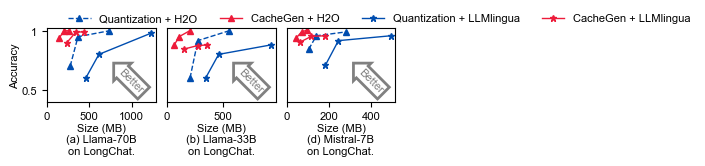

In [99]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.axisartist.axislines import SubplotZero
import json
from io import StringIO
import pandas as pd

fontsize = 8
plt.rcParams["font.family"] = "Arial"
plt.rcParams['font.size'] = fontsize
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['lines.linewidth']=1
plt.rcParams['lines.markersize']=4

CYAN_LINE = "#00cccc"
CYAN = "cyan"
ORANGE_LINE = "#F2AA3C"
ORANGE = "orange"
GREEN = "#0BEF48"
BLUE = "blue"
PURPLE = "#B682F8"
colors = [
    '#004DAF',
    '#ED1B3A',
    '#FF9900',
    '#33A02C',
    '#FABEAF',
    '#AAD59B',
    '#FC5A50',
    "#008080",
    "#0000FF",
    "#808000",
    "#800080"
]
SYS_COLOR = colors[1]
WORSE_BASELINE_COLOR = colors[0]
BETTER_BASELINE_COLOR = colors[0]
H2O_COLOR = "forestgreen"
LLMLINGUA_COLOR = "violet"
def plot(csv, ax, title, xlabel, type, bottom_title = None,
                      need_y_label=False, need_legend=-1):

    data = json.load(open(csv))
    lines = []
    # lines += [ax.plot(data[f'h2o_{type}'], data['h2o_quality'], c=BETTER_BASELINE_COLOR, marker="^",  label="H2O")]
    if type == "ttft":
        lines += [ax.plot(data[f'text_{type}'], data[f'text_quality'], marker="x", c=BETTER_BASELINE_COLOR, label="Text", markersize=6)]
    # if title == "Llama-70B" or title == "Llama-7B":
    lines+=[ax.plot(data[f'h2o_quantization_{type}'], data[f'h2o_quantization_quality'], marker="^", c=BETTER_BASELINE_COLOR, label="Quantization + H2O", ls="--")]
    lines+=[ax.plot(data[f'h2o_cg_final_{type}'], data[f'h2o_cg_final_quality'], marker="^", c=SYS_COLOR, label="CacheGen + H2O")]
    
    
    
    lines+=[ax.plot(data[f'llmlingua_quantization_{type}'], data[f'llmlingua_quantization_quality'], marker="*", c=BETTER_BASELINE_COLOR, label="Quantization + LLMlingua", markersize=5)]

    lines+=[ax.plot(data[f'llmlingua_cg_{type}'], data[f'llmlingua_cg_quality'], marker="*", c=SYS_COLOR, label="CacheGen + LLMlingua", markersize=5)]

    if title in ["NQA", "TQA", "Wikitext"]:
        lines+=[ax.plot(data[f'llmlingua_quantization_{type}'], data[f'llmlingua_quantization_quality'], marker="*", c=BETTER_BASELINE_COLOR, label="Quantization + LLMlingua", markersize=5, ls="--")]

        lines+=[ax.plot(data[f'llmlingua_cg_{type}'], data[f'llmlingua_cg_quality'], marker="*", c=SYS_COLOR, label="CacheGen + LLMlingua", markersize=5)]
        lines+=[ax.plot(data[f'h2o_quantization_{type}'], data[f'h2o_quantization_quality'], marker="^", c=BETTER_BASELINE_COLOR, label="CacheGen + LLM-Lingua", ls="--")]

        ax.plot(data[f'h2o_cg_final_{type}'], data[f'h2o_cg_final_quality'], marker="^", c=SYS_COLOR, label="CacheGen + H2O")
        print("yes", type, data[f'h2o_cg_final_{type}'])
    
    # ax.set_title(title, fontsize=fontsize)
    # ax.set_ylim(bottom=0, top=1.05)
    ax.set_yticks([])
    ax.set_ylabel("")
    if need_y_label:
        ax.set_ylabel("Accuracy",
                      fontsize=fontsize, labelpad=1)
        
        if title in ["Llama-7B","Llama-33B", "Llama-70B"]:
            
            ax.set_yticks([0, 0.5, 1], [0, 0.5, 1], fontsize=fontsize)
    if title == "TQA":
        ax.set_yticks([0,  100], [0, 100], fontsize=fontsize)
    if title in ["NQA", "TQA"]:
        ax.set_ylabel("F1 score (%)",
                      fontsize=fontsize, labelpad=0)
    if title in ['Wikitext']:
        ax.set_ylabel("Perplexity",
                      fontsize=fontsize, labelpad=1)
    # if need_legend >= 0:
    #     # if type=="size":
    #     #     ax.legend(loc="upper right", frameon=False,
    #     #                 bbox_to_anchor=[2.7, 1.4], ncol=4)
    #     if type=="size":
    #         ax.legend(loc="upper right", frameon=False,
    #                     bbox_to_anchor=[2.7, 1.6], ncol=2)
    # t = ax.text(0.1, 0.1, title, c='black', transform=ax.transAxes, fontsize=fontsize + 1, weight="bold")
    if xlabel=="Size (MB)":
        ax.set_xlabel(xlabel + "\n " + bottom_title, labelpad=1)
    else:
        ax.set_xlabel(xlabel, labelpad=1)
    
    ax.set_xlim(left=0)
    if title in ["Llama-7B","Llama-33B", "Llama-70B"]:
        ax.set_ylim(bottom=0.4)
    if title in ['Wikitext']:
        ax.set_ylim(top=15)
        
    if title == "TQA":
        ax.set_ylim((0, 100))
    # ax.set_xscale("log")
    
    

fig, axes = plt.subplots(1, 3, figsize=(4.5, 0.95),constrained_layout=True)
plt.subplots_adjust(wspace=0.1, hspace=0.6)

cur_type = "size"
plot('longchat_7B.json', axes[2], "Llama-7B", "Size (MB)",bottom_title="(d) Mistral-7B \non LongChat.", type=cur_type)
plot('longchat_30B.json', axes[1], "Llama-33B", "Size (MB)", bottom_title="(b) Llama-33B \non LongChat.", type=cur_type)
plot('longchat_70B.json', axes[0], "Llama-70B", "Size (MB)", bottom_title="(a) Llama-70B \non LongChat.", need_y_label=True,    need_legend=True, type=cur_type)

# plot('tqa.json', axes[3], "TQA", "Size (MB)", type=cur_type,  bottom_title="(e) Llama-70B on TriviaQA.")
# plot('wikitext.json', axes[4], "Wikitext", "Size (MB)", bottom_title="(f) Llama-70B on WikiText.",type=cur_type)

# plot('nqa.json', axes[5], "NQA", "Size (MB)", bottom_title="(g) Llama-70B on NarrativeQA.",type=cur_type,need_y_label=True,)
axes[0].legend(bbox_to_anchor=(6, 1.34), ncol=4, frameon=False)

for ax in axes:
    bbox_props = dict(boxstyle="larrow", fc=(1,1,1), ec="grey", lw=2)
    t = ax.text(0.9, 0.1, "Better", ha="right", 
                va="bottom", rotation=-45, bbox=bbox_props, c='grey',
                transform=ax.transAxes)

cur_type = "ttft"

fig.savefig("fig-e2e-longchat-h2o-a.pdf", bbox_inches="tight", transparent=True)

yes size [77, 147, 265]
yes size [36, 68, 171]
yes size [127, 306, 436]


/var/folders/5z/bk2ncwv55fj7xzpm8tlfhzpm0000gn/T/ipykernel_73608/4187947598.py:121: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(wspace=0.25, hspace=0.6)


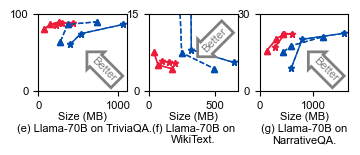

In [96]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.axisartist.axislines import SubplotZero
import json
from io import StringIO
import pandas as pd

fontsize = 8
plt.rcParams["font.family"] = "Arial"
plt.rcParams['font.size'] = fontsize
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['lines.linewidth']=1
plt.rcParams['lines.markersize']=4

CYAN_LINE = "#00cccc"
CYAN = "cyan"
ORANGE_LINE = "#F2AA3C"
ORANGE = "orange"
GREEN = "#0BEF48"
BLUE = "blue"
PURPLE = "#B682F8"
colors = [
    '#004DAF',
    '#ED1B3A',
    '#FF9900',
    '#33A02C',
    '#FABEAF',
    '#AAD59B',
    '#FC5A50',
    "#008080",
    "#0000FF",
    "#808000",
    "#800080"
]
SYS_COLOR = colors[1]
WORSE_BASELINE_COLOR = colors[0]
BETTER_BASELINE_COLOR = colors[0]
H2O_COLOR = "forestgreen"
LLMLINGUA_COLOR = "violet"
def plot(csv, ax, title, xlabel, type, bottom_title = None,
                      need_y_label=False, need_legend=-1):

    data = json.load(open(csv))
    lines = []
    # lines += [ax.plot(data[f'h2o_{type}'], data['h2o_quality'], c=BETTER_BASELINE_COLOR, marker="^",  label="H2O")]
    if type == "ttft":
        lines += [ax.plot(data[f'text_{type}'], data[f'text_quality'], marker="x", c=BETTER_BASELINE_COLOR, label="Text", markersize=6)]
    # if title == "Llama-70B" or title == "Llama-7B":
    lines+=[ax.plot(data[f'h2o_quantization_{type}'], data[f'h2o_quantization_quality'], marker="^", c=BETTER_BASELINE_COLOR, label="Quantization + H2O", ls="--")]
    lines+=[ax.plot(data[f'h2o_cg_final_{type}'], data[f'h2o_cg_final_quality'], marker="^", c=SYS_COLOR, label="CacheGen + H2O")]
    
    
    
    lines+=[ax.plot(data[f'llmlingua_quantization_{type}'], data[f'llmlingua_quantization_quality'], marker="*", c=BETTER_BASELINE_COLOR, label="Quantization + LLMlingua", markersize=5)]

    lines+=[ax.plot(data[f'llmlingua_cg_{type}'], data[f'llmlingua_cg_quality'], marker="*", c=SYS_COLOR, label="CacheGen + LLMlingua", markersize=5)]

    if title in ["NQA", "TQA", "Wikitext"]:
        lines+=[ax.plot(data[f'llmlingua_quantization_{type}'], data[f'llmlingua_quantization_quality'], marker="*", c=BETTER_BASELINE_COLOR, label="Quantization + LLMlingua", markersize=5, ls="--")]

        lines+=[ax.plot(data[f'llmlingua_cg_{type}'], data[f'llmlingua_cg_quality'], marker="*", c=SYS_COLOR, label="CacheGen + LLMlingua", markersize=5)]
        lines+=[ax.plot(data[f'h2o_quantization_{type}'], data[f'h2o_quantization_quality'], marker="^", c=BETTER_BASELINE_COLOR, label="CacheGen + LLM-Lingua", ls="--")]

        ax.plot(data[f'h2o_cg_final_{type}'], data[f'h2o_cg_final_quality'], marker="^", c=SYS_COLOR, label="CacheGen + H2O")
        print("yes", type, data[f'h2o_cg_final_{type}'])
    
    # ax.set_title(title, fontsize=fontsize)
    # ax.set_ylim(bottom=0, top=1.05)
    ax.set_yticks([])
    ax.set_ylabel("")
    if need_y_label:
        ax.set_ylabel("Accuracy",
                      fontsize=fontsize, labelpad=1)
        
        if title in ["Llama-7B","Llama-33B", "Llama-70B"]:
            
            ax.set_yticks([0, 0.5, 1], [0, 0.5, 1], fontsize=fontsize)
    if title == "TQA":
        ax.set_yticks([0,  100], [0, 100], fontsize=fontsize)
    if title == "NQA":
        ax.set_yticks([0,  30], [0, 30], fontsize=fontsize)
    if title == "Wikitext":
        ax.set_yticks([0,  15], [0, 15], fontsize=fontsize)
    # if title in ["NQA", "TQA"]:
    #     ax.set_ylabel("F1 score (%)",
    #                   fontsize=fontsize, labelpad=0)
    # if title in ['Wikitext']:
    #     ax.set_ylabel("Perplexity",
    #                   fontsize=fontsize, labelpad=1)
    # if need_legend >= 0:
    #     # if type=="size":
    #     #     ax.legend(loc="upper right", frameon=False,
    #     #                 bbox_to_anchor=[2.7, 1.4], ncol=4)
    #     if type=="size":
    #         ax.legend(loc="upper right", frameon=False,
    #                     bbox_to_anchor=[2.7, 1.6], ncol=2)
    # t = ax.text(0.1, 0.1, title, c='black', transform=ax.transAxes, fontsize=fontsize + 1, weight="bold")
    if xlabel=="Size (MB)":
        ax.set_xlabel(xlabel + "\n " + bottom_title, labelpad=1)
    else:
        ax.set_xlabel(xlabel, labelpad=1)
    
    ax.set_xlim(left=0)
    if title in ["Llama-7B","Llama-33B", "Llama-70B"]:
        ax.set_ylim(bottom=0.4)
    if title in ['Wikitext']:
        ax.set_ylim(top=15)
        
    if title == "TQA":
        ax.set_ylim((0, 100))
    if title == "NQA":
        ax.set_ylim((0, 30))
    if title == "Wikitext":
        ax.set_ylim((0, 15))
    # ax.set_xscale("log")
    
    

fig, axes = plt.subplots(1, 3, figsize=(4, 1),constrained_layout=True)
plt.subplots_adjust(wspace=0.25, hspace=0.6)

cur_type = "size"

plot('tqa.json', axes[0], "TQA", "Size (MB)", type=cur_type,  bottom_title="(e) Llama-70B on TriviaQA.")
plot('wikitext.json', axes[1], "Wikitext", "Size (MB)", bottom_title="(f) Llama-70B on \nWikiText.",type=cur_type)

plot('nqa.json', axes[2], "NQA", "Size (MB)", bottom_title="(g) Llama-70B on \nNarrativeQA.",type=cur_type)

for ax in [axes[0], axes[2]]:
    bbox_props = dict(boxstyle="larrow", fc=(1,1,1), ec="grey", lw=2)
    t = ax.text(0.9, 0.1, "Better", ha="right", 
                va="bottom", rotation=-45, bbox=bbox_props, c='grey',
                transform=ax.transAxes)
for ax in [axes[1]]:
    bbox_props = dict(boxstyle="larrow", fc=(1,1,1), ec="grey", lw=2)
    t = ax.text(0.9, 0.48, "Better", ha="right", 
               va="bottom", rotation=45, bbox=bbox_props, c='grey',
               transform=ax.transAxes)

cur_type = "ttft"

fig.savefig("fig-e2e-longchat-h2o.pdf", bbox_inches="tight", transparent=True)

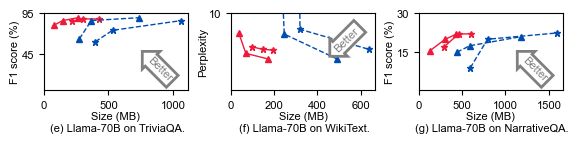

In [10]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.axisartist.axislines import SubplotZero
import json
from io import StringIO
import pandas as pd

fontsize = 8
plt.rcParams["font.family"] = "Arial"
plt.rcParams['font.size'] = fontsize
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['lines.linewidth']=1
plt.rcParams['lines.markersize']=4

CYAN_LINE = "#00cccc"
CYAN = "cyan"
ORANGE_LINE = "#F2AA3C"
ORANGE = "orange"
GREEN = "#0BEF48"
BLUE = "blue"
PURPLE = "#B682F8"
colors = [
    '#004DAF',
    '#ED1B3A',
    '#FF9900',
    '#33A02C',
    '#FABEAF',
    '#AAD59B',
    '#FC5A50',
    "#008080",
    "#0000FF",
    "#808000",
    "#800080"
]
SYS_COLOR = colors[1]
WORSE_BASELINE_COLOR = colors[0]
BETTER_BASELINE_COLOR = colors[0]
H2O_COLOR = "forestgreen"
LLMLINGUA_COLOR = "violet"
def plot(csv, ax, title, xlabel, type, bottom_title = None,
                      need_y_label=False, need_legend=-1):

    data = json.load(open(csv))
    lines = []
    # lines += [ax.plot(data[f'llmlingua_{type}'], data['llmlingua_quality'], c=BETTER_BASELINE_COLOR, marker="*",  label="LLMlingua", markersize=5)]
    if type == "ttft":
        lines += [ax.plot(data[f'text_{type}'], data[f'text_quality'], marker="x", c=BETTER_BASELINE_COLOR, label="Text", markersize=6)]
    lines+=[ax.plot(data[f'llmlingua_quantization_{type}'], data[f'llmlingua_quantization_quality'], marker="*", c=BETTER_BASELINE_COLOR, label="Quantization + LLMlingua", markersize=5, ls="--")]

    lines+=[ax.plot(data[f'llmlingua_cg_{type}'], data[f'llmlingua_cg_quality'], marker="*", c=SYS_COLOR, label="CacheGen + LLMlingua", markersize=5)]
    lines+=[ax.plot(data[f'h2o_quantization_{type}'], data[f'h2o_quantization_quality'], marker="^", c=BETTER_BASELINE_COLOR, label="CacheGen + LLM-Lingua", ls="--")]

    lines+=[ax.plot(data[f'h2o_cg_final_{type}'], data[f'h2o_cg_final_quality'], marker="^", c=SYS_COLOR, label="CacheGen + H2O")]
    # ax.set_ylim(bottom=0, top=30)
    ax.set_yticks([])
    ax.set_ylabel("")
    if need_y_label:
        
        if title == "NQA":
            ax.set_yticks([0, 15, 30], [0, 15, 30], fontsize=fontsize)
            ax.set_ylabel("F1 score (%)",
                      fontsize=fontsize, labelpad=1)
        elif title == "TQA":
            ax.set_yticks([0, 45, 95], [0,45, 95], fontsize=fontsize)
            ax.set_ylabel("F1 score (%)",
                      fontsize=fontsize, labelpad=1)
        else:
            ax.set_ylim((0, 10))
            ax.set_yticks([0, 10], [0, 10], fontsize=fontsize)
            ax.set_ylabel("Perplexity",
                      fontsize=fontsize, labelpad=1)
    if need_legend >= 0:
        if type=="ttft":
            ax.legend(loc="upper right", frameon=False,
                        bbox_to_anchor=[3, 1.4], ncol=4)
    # t = ax.text(0.1, 0.1, title, c='black', transform=ax.transAxes, fontsize=fontsize + 1, weight="bold")
    if xlabel=="Size (MB)":
        ax.set_xlabel(xlabel + "\n " + bottom_title, labelpad=1)
    else:
        ax.set_xlabel(xlabel, labelpad=1)
    
    ax.set_xlim(left=0)
    ax.set_ylim(bottom=0.4)
    # ax.set_xscale("log")

fig, axes = plt.subplots(1, 3, figsize=(6.7, 1))
plt.subplots_adjust(wspace=0.3, hspace=0.6)

cur_type = "size"
plot('tqa.json', axes[0], "TQA", "Size (MB)", type=cur_type,  bottom_title="(e) Llama-70B on TriviaQA.",
     need_y_label=True, need_legend=True)
plot('wikitext.json', axes[1], "Wikitext", "Size (MB)", bottom_title="(f) Llama-70B on WikiText.",type=cur_type, need_y_label=True,)
plot('nqa.json', axes[2], "NQA", "Size (MB)", bottom_title="(g) Llama-70B on NarrativeQA.",type=cur_type,need_y_label=True,)



for ax in [axes[0], axes[2]]:
    bbox_props = dict(boxstyle="larrow", fc=(1,1,1), ec="grey", lw=2)
    t = ax.text(0.9, 0.1, "Better", ha="right", 
                va="bottom", rotation=-45, bbox=bbox_props, c='grey',
                transform=ax.transAxes)

    
for ax in [axes[1]]:
    bbox_props = dict(boxstyle="larrow", fc=(1,1,1), ec="grey", lw=2)
    t = ax.text(0.9, 0.48, "Better", ha="right", 
               va="bottom", rotation=45, bbox=bbox_props, c='grey',
               transform=ax.transAxes)
cur_type = "ttft"
fig.savefig("fig-e2e-wikitext-llmlingua.pdf", bbox_inches="tight", transparent=True)